# 3. Data Visualization¶

## 3.1 Importing package

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..'))) # Add the parent directory to sys.path

from superstore_sales.config import CLEANED_DATA_DIR, FIGURES_DIR

## 3.2 Downloading Cleaned Dataframe

In [2]:
# Define file path
print(f"Data will be loaded from {CLEANED_DATA_DIR}")
parquet_file = os.path.join(CLEANED_DATA_DIR, 'SuperStoreOrders_clean.parquet')

# Load DataFrame
df_clean = pd.read_parquet(parquet_file)

print(f"Data successfully from Parquet format.")

Data will be loaded from C:\Users\josue\Documents\Python\projects\SuperStore_Sales\data\2-cleaned
Data successfully from Parquet format.


## 3.3 Profit Distribution
A histogram is plotted to visualize the distribution of profit values. The distribution appears leptokurtic. This suggests that profit values are concentrated around the mean, with frequent extreme values (both high gains and significant losses). A dashed vertical line marks the mean profit, helping to highlight the central tendency. The presence of extreme values indicates potential outliers or volatility in profit generation, which may warrant further investigation.

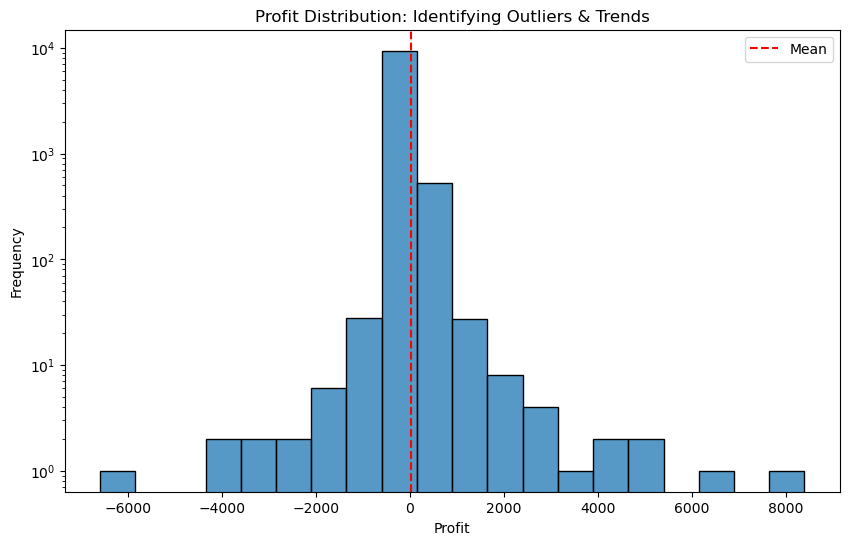

In [3]:
plt.figure(figsize=(10,6))
sns.histplot(data = df_clean, x='Profit', bins=20)#, kde=True)
plt.axvline(df_clean["Profit"].mean(), color='red', linestyle='dashed', label='Mean')
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.title("Profit Distribution: Identifying Outliers & Trends")
plt.yscale('log')
plt.legend()
plt.savefig(os.path.join(FIGURES_DIR,'hist_profit.png'), format = 'png')
plt.show()

## 3.4 Visualizing Profit Distribution via Boxplot
A boxplot is used to further examine the distribution of profit. The visualization confirms the leptokurtic nature of the profit distribution, as indicated by a compact interquartile range (IQR) and numerous outliers extending far from the whiskers. This suggests that while most profits cluster near the median, there are many extreme values, emphasizing the high variability in profitability. Understanding these variations can be crucial for making informed business decisions regarding pricing and discount strategies.

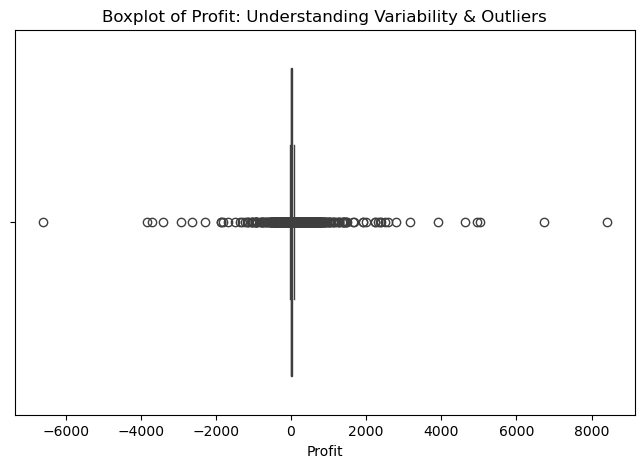

In [4]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x="Profit")
plt.title("Boxplot of Profit: Understanding Variability & Outliers")
plt.savefig(os.path.join(FIGURES_DIR,'boxplot_profit.png'), format = 'png')
plt.show()

## 3.5 Comparing Sales, Quantity, Discount, and Profit Distributions
Boxplots are generated for four key variables: Sales, Quantity, Discount, and Profit. By displaying them together, differences in their distributions and the presence of extreme values can be easily compared

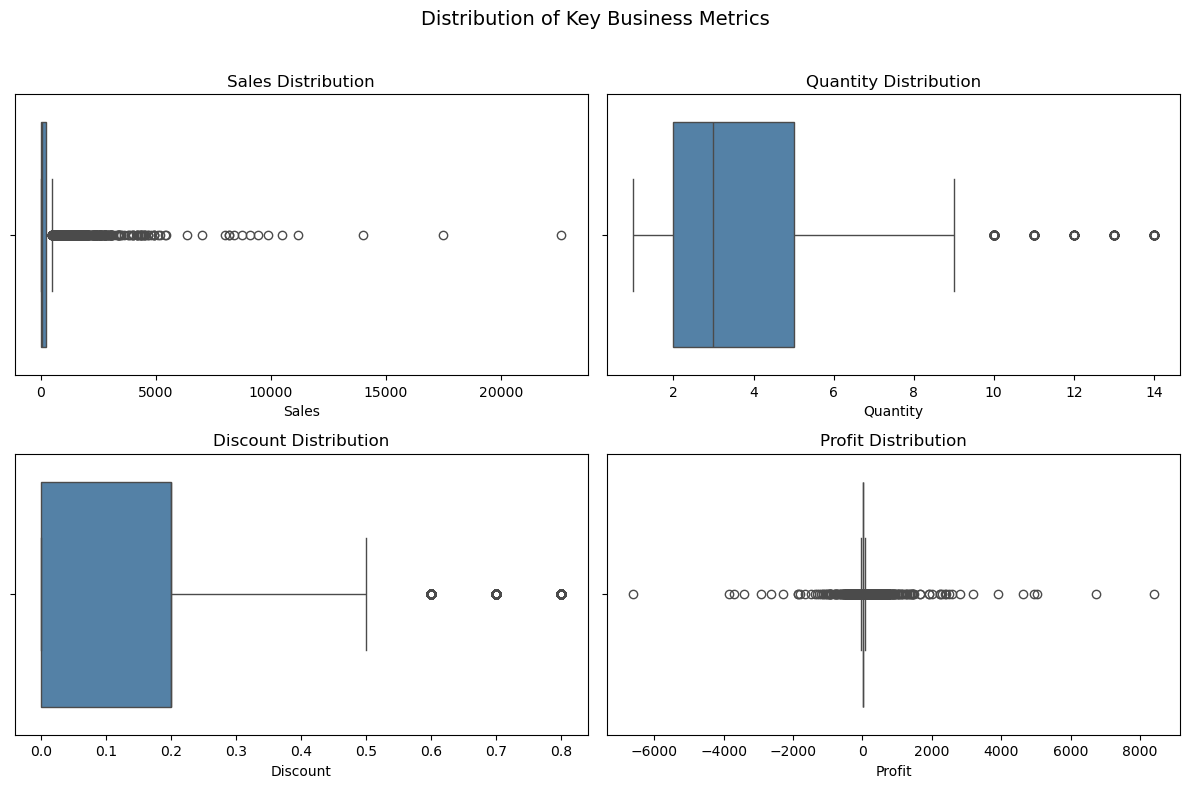

In [5]:
cols = ['Sales', 'Quantity', 'Discount', 'Profit']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distribution of Key Business Metrics", fontsize=14)

for ax, col in zip(axes.flatten(), cols):
    sns.boxplot(data=df_clean, x=col, ax=ax, color='steelblue')
    ax.set_title(f"{col} Distribution")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(os.path.join(FIGURES_DIR,'boxplot_metrics.png'), format = 'png')
plt.show()

## 3.6 Correlation Analysis Summary
Correlation matrices are computed and displayed for key relationships. The correlation between Discount and Sales is weak (-0.028), indicating little direct impact. However, a stronger negative correlation (-0.219) is observed between Discount and Profit, suggesting that increasing discounts generally lead to lower profitability.

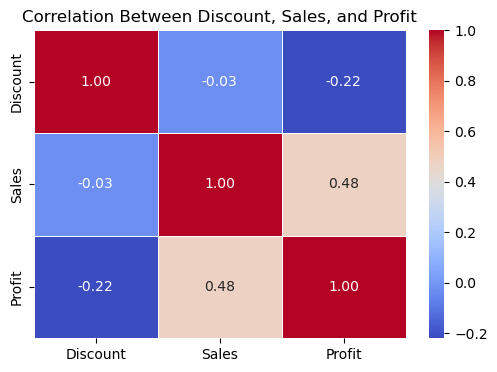

In [6]:
corr_matrix = df_clean[['Discount', 'Sales', 'Profit']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Between Discount, Sales, and Profit")
plt.savefig(os.path.join(FIGURES_DIR,'heatmap_corr.png'), format = 'png')
plt.show()

## 3.7 Discount vs. Profit Analysis
A scatter plot is created to analyze the relationship between Discount and Profit. Profit values are color-coded, with positive profits in blue and negative profits in red. The plot visually confirms the negative correlation found in the previous section, illustrating how higher discounts often result in losses.

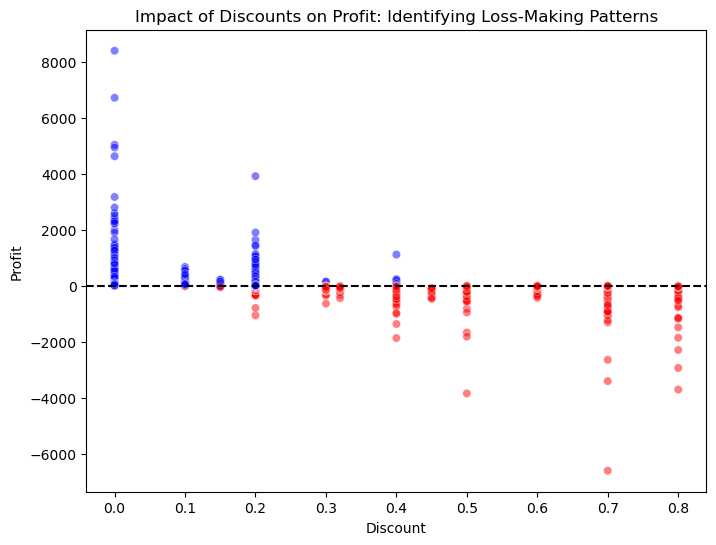

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a color column where positive profit is blue and negative is red
df_clean["Profit_Color"] = df_clean["Profit"].apply(lambda x: "blue" if x >= 0 else "red")

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, 
                x="Discount", 
                y="Profit", 
                alpha=0.5, 
                hue=df_clean["Profit"] >= 0, 
                palette={True: "blue", False: "red"}, 
                legend=False)

plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Impact of Discounts on Profit: Identifying Loss-Making Patterns")
plt.axhline(0, color='black', linestyle='dashed')
plt.savefig(os.path.join(FIGURES_DIR,'scatter_disc_vs_profit.png'), format = 'png')
plt.show()

## 3.8 Discount vs. Profit Analysis
A bar chart is used to visualize the average sales amount for different discount levels. This helps understand whether increasing discounts lead to higher average sales volumes.

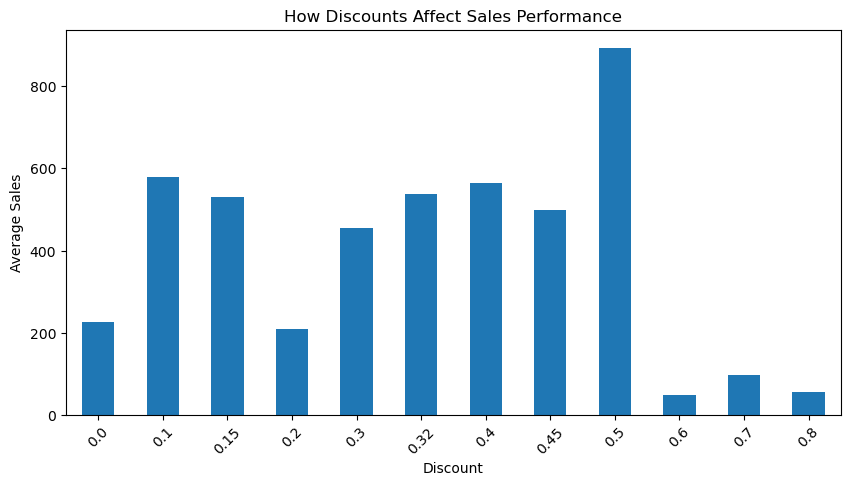

In [8]:
df_clean.groupby("Discount")["Sales"].mean().plot(kind="bar", figsize=(10,5))

plt.xlabel("Discount")
plt.ylabel("Average Sales")
plt.title("How Discounts Affect Sales Performance")
plt.xticks(rotation=45)
plt.savefig(os.path.join(FIGURES_DIR,'barplot_discount_Vs_avg-sales.png'), format = 'png')
plt.show()

## 3.9 Conclusion

The **data cleaning process** has been **crucial** in preparing the dataset for comprehensive analysis and insightful visualizations. With the following improvements, the dataset is now ready for advanced analysis:

- **Data types corrected** for consistency
- **Categorical values optimized** for efficiency
- **No missing values** or **inconsistent data**
- **Invalid shipping dates removed** for reliability

During the data visualization phase, we gained valuable insights into the dataset's structure and the relationships between key variables. Notably:

- **Profit distribution** revealed significant **variability** and outliers, which may warrant further investigation.
- **Correlation analysis** showed that discounts have a **weak negative correlation** with sales, while there is a **stronger negative correlation** with profit, suggesting that higher discounts can lead to reduced profitability.
- **Scatter plots** confirmed the relationship between discounts and profit, with higher discounts often associated with **negative profit values**.
- **Boxplots** of sales, quantity, discount, and profit distributions highlighted **data dispersion**, revealing variations and potential outliers.
- **Bar charts** illustrated how **discounts impact sales**, providing a clear understanding of how different discount levels affect sales performance.

### 3.9.1 In summary:

The dataset is now **cleaned, structured, and well-prepared** for **advanced analysis** or **dashboard creation**. This thorough **data cleaning** process ensures that the dataset is reliable and accurate, offering a solid foundation for **data-driven decision-making** and future analyses. It’s a powerful reminder of how critical data cleaning is to ensure meaningful insights and impactful results.
